In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
class MLR:
    def __init__(self, learning_rate = 0.01, num_iter = 1000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.randn(num_features)
        self.bias = 0

        for _ in range(self.num_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = np.mean((y_pred - y) ** 2)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/ num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


    def get_parameters(self):
        return self.theta

    def plot_regression_plane(self, X1, X2, y):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X1, X2, y)
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')

        # Create a meshgrid for the regression plane
        x1_plane, x2_plane = np.meshgrid(X1, X2)
        y_plane = self.theta[0][0] + self.theta[1][0] * x1_plane + self.theta[2][0] * x2_plane

        # Plot the regression plane
        ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.5, color='red')

        plt.show()

In [3]:
housing = fetch_california_housing(as_frame = True)

In [4]:
housing = housing.frame
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


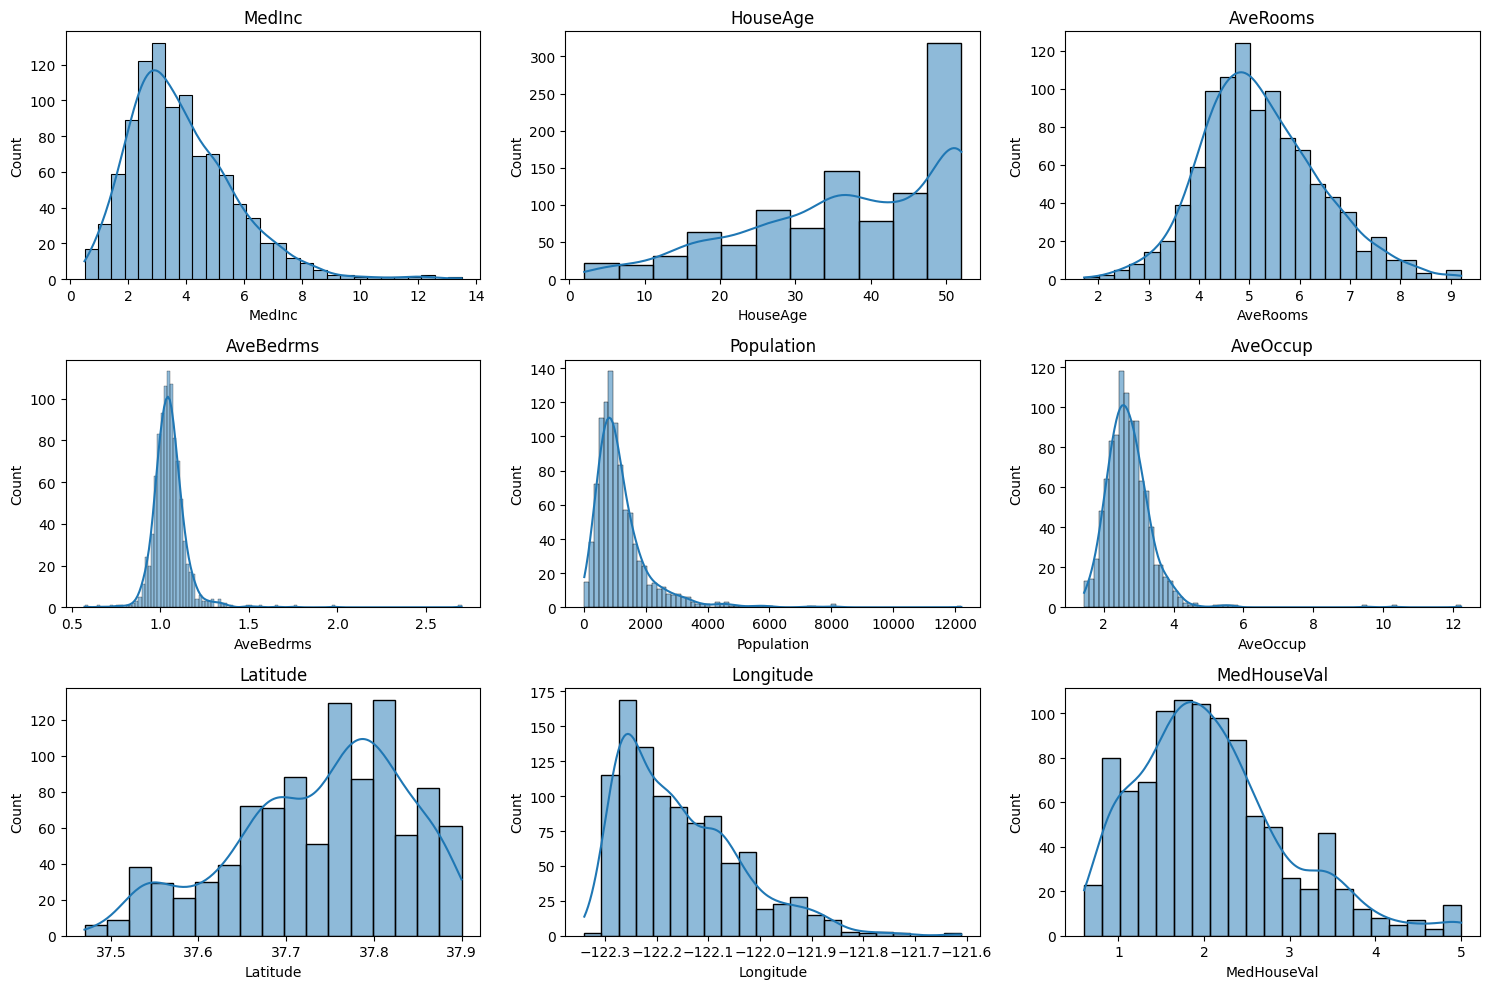

In [ ]:
plt.figure(figsize = (15, 10))
sns.set_style()

for i, feature in enumerate(housing.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x = feature, data = housing[:1000], kde = True)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

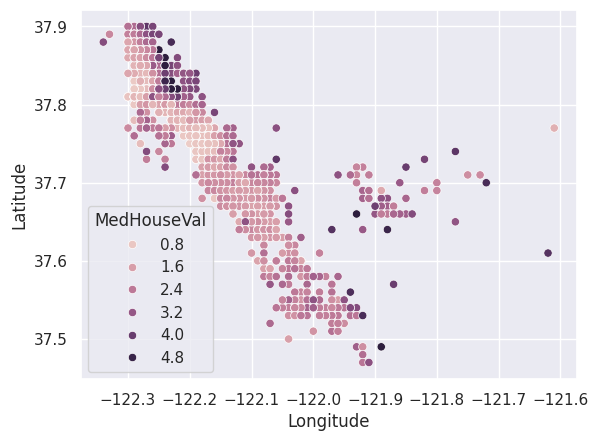

In [ ]:
sns.set_theme()

sns.scatterplot(data = housing[:1000], x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')
plt.show()

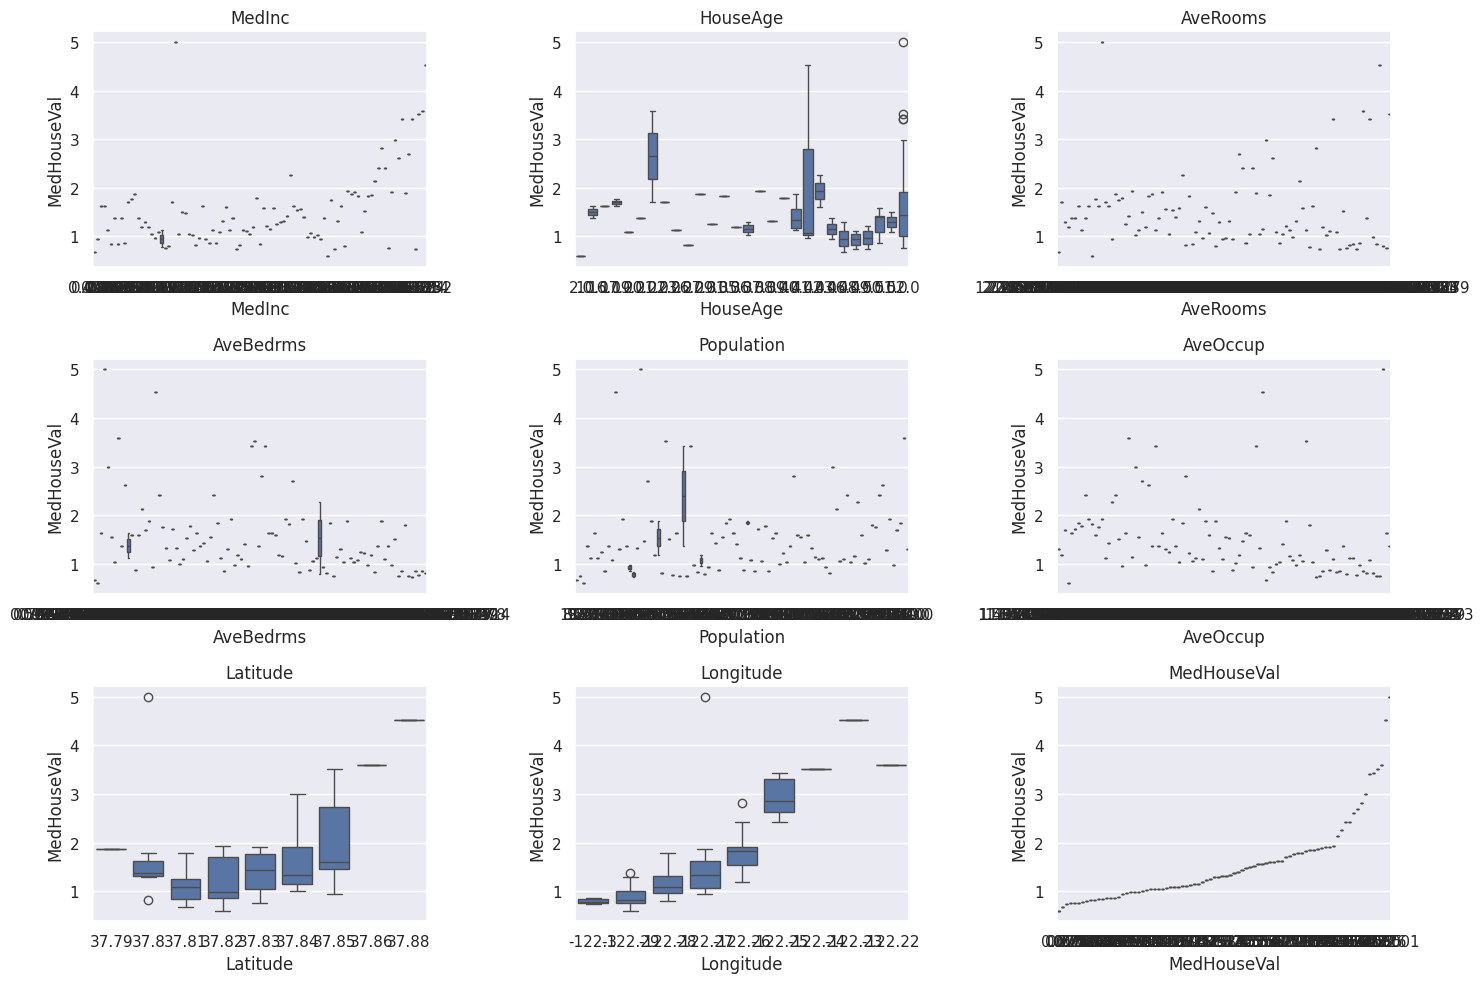

In [ ]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(housing.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = feature, y = 'MedHouseVal', data = housing[:100])
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

In [8]:
X = housing.iloc[:, :-1]
y = housing.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

# y_train_scaled = scaler.fit_transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

regression_custom_model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLR(learning_rate = 0.01, num_iter = 5000))
])

regression_custom_model_pipeline.fit(X_train, y_train.reshape(-1))

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', <__main__.MLR object at 0x7cb0334af760>)])

In [14]:
custom_model_pred = regression_custom_model_pipeline.predict(X_test)

In [15]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [16]:
ll_pred = regression_pipeline.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

print("Custom MSE:", mean_squared_error(custom_model_pred, y_test))

Custom MSE: 0.5525072572803985


In [18]:
print("Sklearn Model MSE:", mean_squared_error(ll_pred, y_test))

Sklearn Model MSE: 0.5558915986952442


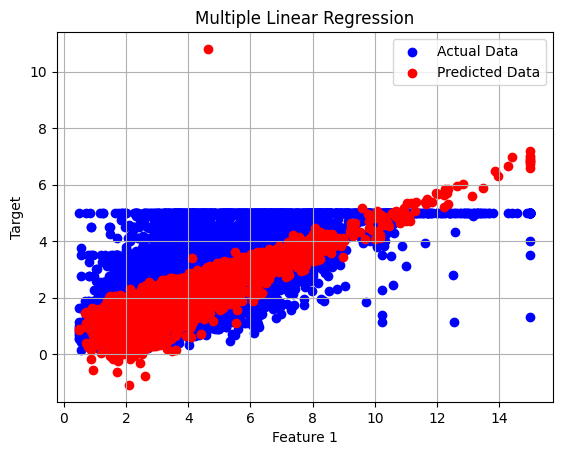

In [30]:
plt.scatter(X_train[:, 0], y_train, label="Actual Data", color="blue")
plt.scatter(X_test[:, 0], custom_model_pred, label="Predicted Data", color="red")

# Plot the regression line
x_line = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
y_line = regression_custom_model_pipeline.named_steps['regressor'].weights[0] * x_line

plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Multiple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()